In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

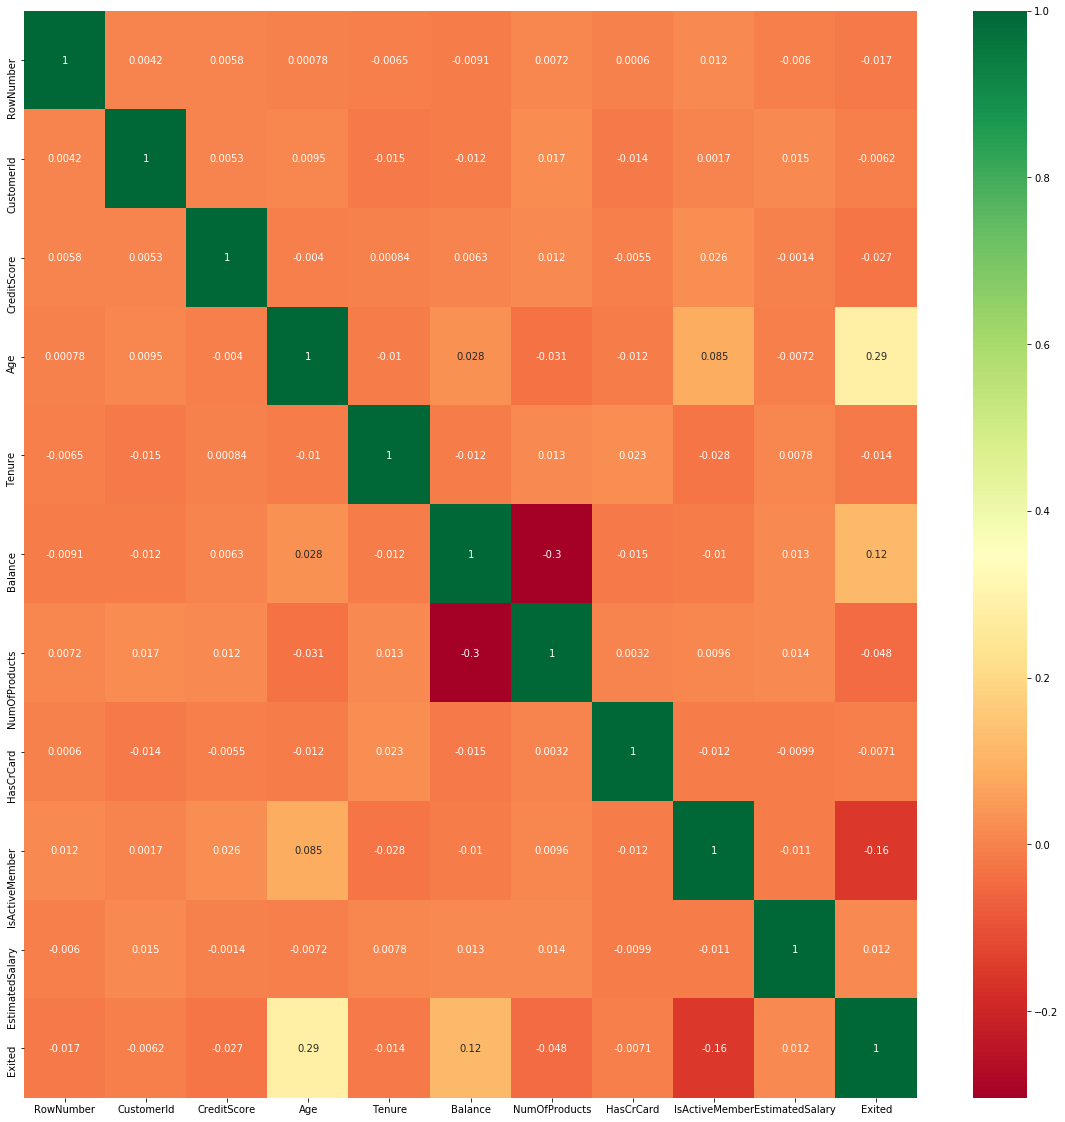

In [7]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap='RdYlGn')

In [8]:
X = df.iloc[:,3:13]
y  =df.iloc[:,13]

In [9]:
geography = pd.get_dummies(X['Geography'],drop_first=True)

In [10]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [11]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [13]:
X = X.drop(['Geography','Gender'],axis=1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.concat([X,geography,gender],axis=1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [18]:
# Hyper parameter optimization
params = {
    "learning_rate"    : [0.5,0.10,0.15,0.20,0.25,0.30],
    "max_depth"        : [3,4,5,6,8,10,12,14],
    "min_child_weight" : [1,3,5,7],
    "gamma"            : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [19]:
classifier = xgboost.XGBClassifier()

In [20]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [21]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    6.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.0s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=Non

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [25]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

In [27]:
score

array([0.868, 0.858, 0.878, 0.861, 0.866, 0.855, 0.865, 0.872, 0.858,
       0.859])

In [28]:
score.mean()

0.8640000000000001

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [39]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
prediction = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(prediction,y_test)
print(cm)
acc_score = accuracy_score(prediction,y_test)
print(acc_score)

[[2306  324]
 [  97  273]]
0.8596666666666667


### Cross Validation


In [52]:
# K Fold Cross validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

In [53]:
score

array([0.868, 0.858, 0.878, 0.861, 0.866, 0.855, 0.865, 0.872, 0.858,
       0.859])

In [54]:
score.mean()

0.8640000000000001

In [56]:
min(score)

0.855

###  Stratified K fold Cross validation

In [57]:
X.shape,y.shape

((10000, 11), (10000,))

In [62]:
from sklearn.model_selection import StratifiedKFold
accuracy = []
skf = StratifiedKFold(n_splits=15,random_state=None)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    print('Train:',train_index, 'Validation',test_index)
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)

Train: [ 644  645  653 ... 9997 9998 9999] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 2

Train: [   0    1    2 ... 9997 9998 9999] Validation [1965 1977 1985 1987 1988 1993 1994 1996 2005 2007 2009 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028
 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042
 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056
 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070
 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084
 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098
 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112
 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126
 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140
 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154
 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168
 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182
 2183 2184 2185 2186 21

Train: [   0    1    2 ... 9997 9998 9999] Validation [3840 3841 3843 3861 3877 3879 3885 3898 3902 3910 3913 3917 3921 3930
 3935 3938 3940 3941 3951 3957 3959 3964 3969 3975 3979 3982 3983 3988
 3991 3998 4001 4005 4013 4014 4017 4021 4026 4033 4036 4037 4038 4043
 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055 4056 4057
 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070 4071
 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083 4084 4085
 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097 4098 4099
 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111 4112 4113
 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125 4126 4127
 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139 4140 4141
 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153 4154 4155
 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167 4168 4169
 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179 4180 4181 4182 4183
 4184 4185 4186 4187 41

Train: [   0    1    2 ... 9997 9998 9999] Validation [5887 5888 5903 5904 5908 5915 5922 5923 5926 5927 5931 5933 5936 5940
 5942 5949 5950 5952 5955 5960 5962 5972 5976 5986 5989 6000 6001 6011
 6014 6022 6023 6028 6029 6036 6037 6038 6039 6040 6041 6042 6043 6044
 6045 6046 6047 6048 6049 6050 6051 6052 6053 6054 6055 6056 6057 6058
 6059 6060 6061 6062 6063 6064 6065 6066 6067 6068 6069 6070 6071 6072
 6073 6074 6075 6076 6077 6078 6079 6080 6081 6082 6083 6084 6085 6086
 6087 6088 6089 6090 6091 6092 6093 6094 6095 6096 6097 6098 6099 6100
 6101 6102 6103 6104 6105 6106 6107 6108 6109 6110 6111 6112 6113 6114
 6115 6116 6117 6118 6119 6120 6121 6122 6123 6124 6125 6126 6127 6128
 6129 6130 6131 6132 6133 6134 6135 6136 6137 6138 6139 6140 6141 6142
 6143 6144 6145 6146 6147 6148 6149 6150 6151 6152 6153 6154 6155 6156
 6157 6158 6159 6160 6161 6162 6163 6164 6165 6166 6167 6168 6169 6170
 6171 6172 6173 6174 6175 6176 6177 6178 6179 6180 6181 6182 6183 6184
 6185 6186 6187 6188 61

Train: [   0    1    2 ... 9997 9998 9999] Validation [7909 7915 7926 7927 7937 7942 7943 7944 7949 7962 7965 7969 7974 7994
 7998 8003 8007 8010 8018 8021 8022 8023 8024 8025 8026 8027 8028 8029
 8030 8031 8032 8033 8034 8035 8036 8037 8038 8039 8040 8041 8042 8043
 8044 8045 8046 8047 8048 8049 8050 8051 8052 8053 8054 8055 8056 8057
 8058 8059 8060 8061 8062 8063 8064 8065 8066 8067 8068 8069 8070 8071
 8072 8073 8074 8075 8076 8077 8078 8079 8080 8081 8082 8083 8084 8085
 8086 8087 8088 8089 8090 8091 8092 8093 8094 8095 8096 8097 8098 8099
 8100 8101 8102 8103 8104 8105 8106 8107 8108 8109 8110 8111 8112 8113
 8114 8115 8116 8117 8118 8119 8120 8121 8122 8123 8124 8125 8126 8127
 8128 8129 8130 8131 8132 8133 8134 8135 8136 8137 8138 8139 8140 8141
 8142 8143 8144 8145 8146 8147 8148 8149 8150 8151 8152 8153 8154 8155
 8156 8157 8158 8159 8160 8161 8162 8163 8164 8165 8166 8167 8168 8169
 8170 8171 8172 8173 8174 8175 8176 8177 8178 8179 8180 8181 8182 8183
 8184 8185 8186 8187 81

[0.8665667166416792, 0.856071964017991, 0.8605697151424287, 0.8725637181409296, 0.8740629685157422, 0.8575712143928036, 0.8665667166416792, 0.8545727136431784, 0.8575712143928036, 0.8695652173913043, 0.8813813813813813, 0.8603603603603603, 0.8618618618618619, 0.8498498498498499, 0.8588588588588588]


In [64]:
import numpy as np
np.array(accuracy).mean()

0.8631996314155235

### Randomizedsearchcv and gridsearch performs k fold cross validation while selecting the right hyperparameters